In [1]:
import pydicom
import matplotlib.pyplot as plt
import os
import numpy as np
import pylab 

In [15]:
'''
遍历文件夹的结构，将dcm文件加入到文件列表当中

param：
- root_folder: 文件夹根路径

return:
- dcmList: 遍历后的文件列表
'''

def load_dcm_files(root_folder):
    dcmList = []

    # 遍历父文件夹下的所有子文件夹
    for folder_name in os.listdir(root_folder):
        folder_path = os.path.join(root_folder, folder_name)

        # 检查子文件夹是否为目录
        if os.path.isdir(folder_path):

            # 遍历当前子文件夹下的所有子子文件夹
            for subfolder_name in os.listdir(folder_path):
                subfolder_path = os.path.join(folder_path, subfolder_name)

                # 检查子子文件夹是否为目录
                if os.path.isdir(subfolder_path):

                    # 遍历当前子子文件夹下的所有文件
                    for file in os.listdir(subfolder_path):

                        #判断文件是否为dicom文件
                        if ".dcm" in file.lower():
			                # print(filename)

                            # 加入到列表中
                            dcmList.append(os.path.join(subfolder_path,file))
    
    return dcmList

In [73]:
# src = 'D:/CTData/test_3/meCT/0001858059/70154803.dcm'
src = 'D:/CTData/test_3/noCT/0001573022/392672035.dcm'
my_dcm = pydicom.dcmread(src)

info = {}

info["PatientID"] = my_dcm.PatientID  # 患者ID
info["BitsStored"] = my_dcm.BitsStored  # 存储位数
info["PatientName"] = my_dcm.PatientName  # 患者姓名
info["PatientBirthData"] = my_dcm.PatientBirthDate  # 患者出生日期
info["PatientAge"] = my_dcm.PatientAge  # 患者年龄
info['PatientSex'] = my_dcm.PatientSex  # 患者性别
info['StudyID'] = my_dcm.StudyID  # 检查ID
info['StudyDate'] = my_dcm.StudyDate  # 检查日期
info['StudyTime'] = my_dcm.StudyTime  # 检查时间
info['InstitutionName'] = my_dcm.InstitutionName  # 机构名称
info['Manufacturer'] = my_dcm.Manufacturer  # 设备制造商
info['StudyDescription'] = my_dcm.StudyDescription  # 检查项目描述

info
# for elem in my_dcm:
#     print(elem.tag)
# print(my_dcm.WindowWidth)
# print(my_dcm.WindowCenter)
# print(my_dcm.RescaleSlope)
# print(my_dcm.RescaleIntercept)

{'PatientID': '0001573022',
 'BitsStored': 16,
 'PatientName': 'FU WEI',
 'PatientBirthData': '19811217',
 'PatientAge': '039Y',
 'PatientSex': 'F',
 'StudyID': '17208',
 'StudyDate': '20201222',
 'StudyTime': '110214',
 'InstitutionName': '2nd Aff hospital of NC Univ.',
 'Manufacturer': 'GE MEDICAL SYSTEMS',
 'StudyDescription': 'CT ABD+ CE'}

In [74]:
info18 = my_dcm.WindowCenter
info19 = my_dcm.WindowWidth
info20 = my_dcm.RescaleIntercept
info21 = my_dcm.RescaleSlope
info22 = my_dcm.pixel_array

In [75]:
# 图像归一化操作
CT = info21 * info22 + info20
CT = info22
print(CT.shape)
print(np.max(CT))
print(np.min(CT))

[[-2000 -2000 -2000 ... -2000 -2000 -2000]
 [-2000 -2000 -2000 ... -2000 -2000 -2000]
 [-2000 -2000 -2000 ... -2000 -2000 -2000]
 ...
 [-2000 -2000 -2000 ... -2000 -2000 -2000]
 [-2000 -2000 -2000 ... -2000 -2000 -2000]
 [-2000 -2000 -2000 ... -2000 -2000 -2000]]
(512, 512)
2532
-2000


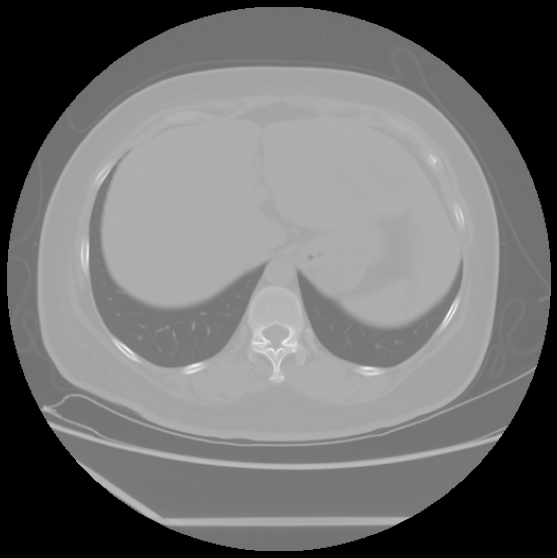

In [76]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(CT,'gray')
plt.show()

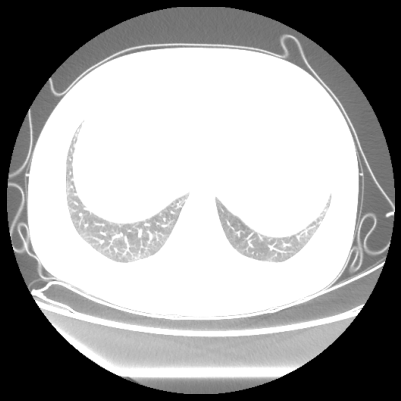

In [77]:
CT_min = info18 - info19/2

CT_max = info18 + info19/2

CT2 = np.clip(CT,CT_min,CT_max) # 小于min的都等于min，大于max的都等于max

plt.figure(figsize=(7.12,7.12)) # 适配屏幕
plt.axis('off')
plt.imshow(CT2,'gray')
plt.show()

In [79]:
import cv2

'''
归一化函数

param：
- img: 图像路径

return:
- img: 图像路径
'''
def to255(img):     # 
    min_val = img.min()
    max_val = img.max()
    img = (img - min_val) / (max_val - min_val + 1e-5)  # 图像归一化
    img = img * 255  # *255
    return img


# 读取原始dcm图像
ds = pydicom.dcmread('D:/CTData/test/opCT/0003158182/465788278.dcm')
info20 = ds.RescaleIntercept
info21 = int(ds.RescaleSlope)
info22 = ds.pixel_array
CT = info21 * info22 + info20
info18 = ds.WindowCenter
info19 = ds.WindowWidth
CT_min = info18 - info19/2
CT_max = info18 + info19/2
CT = np.clip(CT,CT_min,CT_max)
ct_image = to255(CT) # 归一化
cv2.imwrite('./data/dcm.png', ct_image)


True

In [5]:
import os
import pandas as pd

# 指定数据文件夹路径
data_folder = "E:\GBCDL\dataTest"

# 初始化统计字典
statistics = {
    "opCT": {"patients": 0, "slices": 0},
    "meCT": {"patients": 0, "slices": 0},
    "noCT": {"patients": 0, "slices": 0}
}

num = 0
# 遍历数据文件夹
for category in os.listdir(data_folder):
    category_folder = os.path.join(data_folder, category)
    if os.path.isdir(category_folder):
        for patient_id in os.listdir(category_folder):
            patient_folder = os.path.join(category_folder, patient_id)
            if os.path.isdir(patient_folder):
                num_slices = 0
                if os.path.isdir(patient_folder):
                    num_slices += sum(1 for file in list(filter(lambda x: x != 'mask.png', os.listdir(patient_folder))) if file.endswith(".png"))
                statistics[category]["patients"] += 1
                statistics[category]["slices"] += num_slices

# 打印统计结果
print("类别\t病人数量\t切片数量")
for category, stats in statistics.items():
    print(f"{category}\t{stats['patients']}\t{stats['slices']}")
    num=num+stats['slices']
print(f"切片总数:{num}")


类别	病人数量	切片数量
opCT	31	4564
meCT	88	9235
noCT	101	8107
切片总数:21906
